# Chapter 3: Linear Regression for a housing dataset

### Importing the necessary packages

In [ ]:
!git clone https://github.com/s7s/machine_learning_1
%cd  machine_learning_1/linear_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 73 (delta 22), reused 68 (delta 17), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/machine_learning_1/linear_regression


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [ ]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])

print(features)
print(labels)

[1 2 3 5 6 7]
[155 197 244 356 407 448]


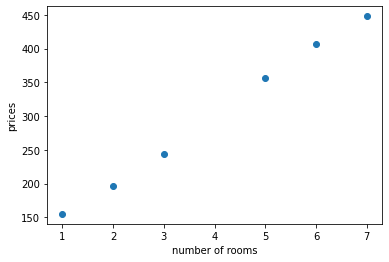

In [ ]:
utils.plot_points(features, labels)

### Coding the tricks

- Simple trick
- Absolute trick
- Square trick

In [ ]:
def simple_trick(base_price, price_per_room, num_rooms, price):
    small_random_1 = random.random()*0.1
    small_random_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if price > predicted_price and num_rooms > 0:
        price_per_room += small_random_1
        base_price += small_random_2
    if price > predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    if price < predicted_price and num_rooms > 0:
        price_per_room -= small_random_1
        base_price -= small_random_2
    if price < predicted_price and num_rooms < 0:
        price_per_room -= small_random_1
        base_price += small_random_2
    return price_per_room, base_price

In [ ]:
def square_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    predicted_price = price_per_room * num_rooms + base_price
    price_per_room += learning_rate * num_rooms * (price - predicted_price)
    base_price += learning_rate * (price - predicted_price)
    #implement square_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price

    return price_per_room, base_price

In [ ]:
def absolute_trick(base_price, price_per_room, num_rooms, price, learning_rate):
    ## TODO ##
    predicted_price = price_per_room * num_rooms + base_price

    if price > predicted_price:
      price_per_room += learning_rate * num_rooms 
      base_price += learning_rate 
    
    elif  price < predicted_price:
      price_per_room -= learning_rate * num_rooms 
      base_price -= learning_rate 

    #implement absolute_trick and return the new price_per_room and base_price
    # calculate the predicted price then calculate the new price_per_room and base_price

    return price_per_room, base_price

### Running the linear regression algorithm

The linear regression algorithm consists of:
- Starting with random weights
- Iterating the square (or simple, or absolute) trick many times.

Price per room: 59.784421851524364
Base price: 48.87795440293915


(59.784421851524364, 48.87795440293915)

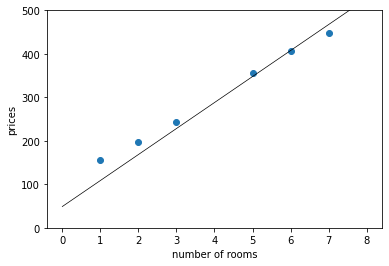

In [ ]:
import random as rd

# We set the random seed in order to always get the same results.
random.seed(0)

def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room =  random.random() # start with random weight
    base_price =  random.random() # start with random bias
    ## TODO ##
    # for this number of epochs 
    for i in range(epochs):
      # get a random datasample of our dataset(x,y)
      index = np.random.randint(0, len(features))
      # using the selected datasample use square_trick fn or absolute_trick fn to update price_per_room and base_price
      price_per_room, base_price = absolute_trick(base_price, price_per_room, features[index], labels[index], learning_rate)

    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price

# This line is for the x-axis to appear in the figure
plt.ylim(0,500)

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Root mean squared error function

In [ ]:
# The root mean square error function
def rmse(labels, predictions):
    ## TODO ##
    # calculate the root meen square error between the labels and predictions
    error = np.sqrt(np.sum(((np.array(predictions)-np.array(labels)))**2/len(labels)))
    return error

### Plotting the error function

Price per room: 49.70926968580633
Base price: 99.30296815711331


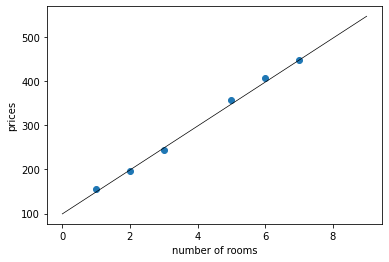

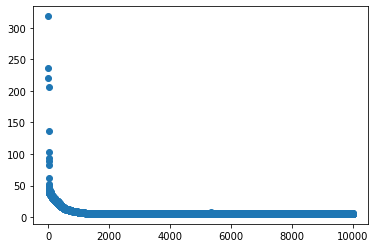

(49.70926968580633, 99.30296815711331)

In [ ]:
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    errors = []
    for i in range(epochs):
        predictions = features*price_per_room+base_price
        errors.append(rmse(labels, predictions))
        i = random.randint(0, len(features)-1)
        num_rooms = features[i]
        price = labels[i]
        # Uncomment one of the following 3 lines to use the simple, the absolute, or the square trick
        #price_per_room, base_price = simple_trick(base_price,
        #price_per_room, base_price = absolute_trick(base_price,
        price_per_room, base_price = square_trick(base_price,
                                                  price_per_room,
                                                  num_rooms,
                                                  price,
                                                  learning_rate=learning_rate)
    utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=9)
    utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    return price_per_room, base_price

linear_regression(features, labels, learning_rate = 0.01, epochs = 10000)

### Linear regression using sklearn



In [ ]:
## TODO ##
# Use sklearn to implement linear regression that fit our data (features, labels)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(features.reshape(-1,1), labels)

In [ ]:
## TODO ##
# print the coefficients and bias of this model
print(reg.coef_)
print(reg.intercept_)

[50.39285714]
99.59523809523819


In [ ]:
## TODO ##
# use this model to predict the price of house that contains 4 rooms
reg.predict(np.array([[4]]))

array([301.16666667])

### Normal Equation



In [ ]:
def Normal_Equation(features,labels):
    ## TODO ##
    # Use normal equation to get the weights
    # don't forget to concatenate ones to the features
    b = np.ones((features.shape[0],1))
    nfeatures = np.hstack((b,features.reshape(features.shape[0],1)))
    W = np.linalg.inv(nfeatures.T @ nfeatures) @ nfeatures.T @ labels 
    return W

W = Normal_Equation(features,labels)
print(W)

[99.5952381  50.39285714]
